<a href="https://colab.research.google.com/github/Tabitha001/Proactive-Risk-Management-for-Creditors/blob/main/Defending_Loan_Proactive_Risk_Management_for_Creditors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, i'll be predicting loan status which is a subset of creditworthiness assessment, focusing specifically on the outcome of the loan repayment.

what are the criteria for creditworthiness?

-capital

-capacity

-condition

-character

-collateral

About Dataset
Detailed data description of Credit Risk dataset:




person_age  :          	Age


person_income 	:        Annual Income


person_home_ownership:	  Home ownership


person_emp_length:	Employment length (in years)


loan_intent:	Loan intent


loan_grade:	Loan grade


loan_amnt:	Loan amount


loan_int_rate:	Interest rate


loan_status:	Loan status (0 is non default 1 is default)


loan_percent_income:	Percent income


cb_person_default_on_file: 	Historical default


cb_preson_cred_hist_length:	Credit history length

Now let's discuss about the project a little further.

For a credit/loan lending startup, it is generally more beneficial for a model to correctly predict which individuals will default on loans. This is because the primary concern for such startups is to manage and minimize the risk of loan defaults. By accurately identifying individuals who are likely to default, the startup can take proactive measures to mitigate the risk, such as adjusting interest rates, loan amounts, or declining the loan application altogether.

Predicting loan defaults helps the lending startup avoid potential financial losses and maintain a healthier loan portfolio. This is especially important in the lending industry where defaulting loans can lead to significant financial challenges and potential business instability.

While it's also useful to predict individuals who won't default (i.e., predicting good borrowers), the consequences of failing to predict loan defaults can be more damaging to the startup's financial health and reputation. As a result, the focus is typically on developing models that are adept at identifying high-risk borrowers to ensure the company's long-term success and stability.


That being said, in this case, *precision* is particularly important. The startup aims to correctly identify individuals who will default on loans (true positives) while avoiding false positives, where the model predicts default but the loan is not actually defaulted. This precision-focused approach helps the startup take proactive measures to mitigate the risk associated with potential loan defaults.

In [3]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [4]:
from google.colab import files

uploaded = files.upload()


Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [5]:
import io
data = io.BytesIO(uploaded['credit_risk_dataset.csv'])

In [6]:
df = pd.read_csv(data)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [8]:
df.shape

(32581, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


There will be need to look more into the person_emp_length column and the person_age column considering the maximum values gotten from the statistical description. It could be an indication of the presence of outliers

In [11]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

The following columns have missing values:

- person_emp_length

- loan_int_rate

In [12]:
df['person_emp_length']

0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32576      1.0
32577      4.0
32578      3.0
32579      5.0
32580      2.0
Name: person_emp_length, Length: 32581, dtype: float64

In [13]:
df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [14]:
#fill missing values with the mean

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [15]:
df.isna().sum().sum()

0

There are no more missing values in the dataset

Now let's do some exploratory analysis

In [16]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

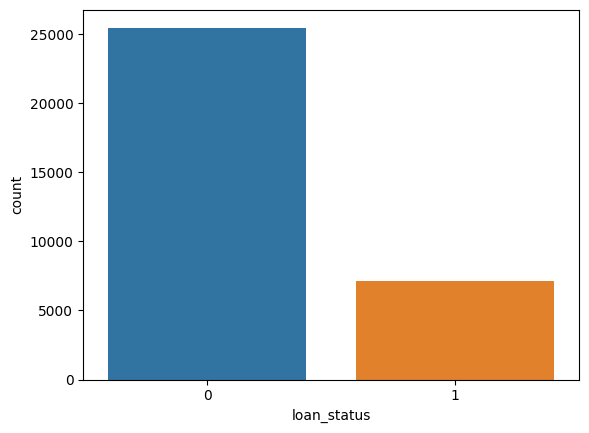

In [17]:
#the target variable
sns.countplot(x = df['loan_status'])

There is a great class imbalance in the target variable which will need to be addressed

A further look into the  person_emp_length column and the person_age column

<Axes: >

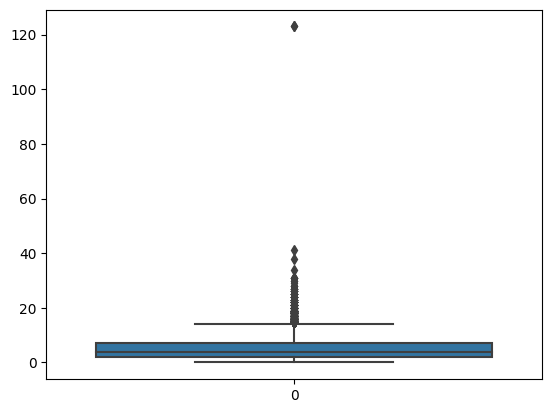

In [18]:
sns.boxplot(df['person_emp_length'])

<Axes: >

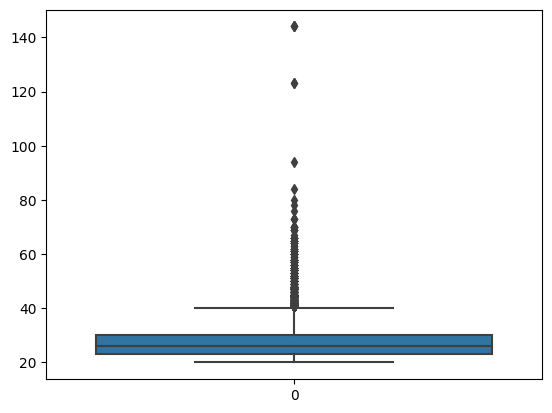

In [19]:
sns.boxplot(df['person_age'])

In [20]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [21]:
person_emp_length_outliers = find_outliers_IQR(df['person_emp_length'])

print('number of outliers: '+ str(len(person_emp_length_outliers)))

print('max outlier value: '+ str(person_emp_length_outliers.max()))

print('min outlier value: '+ str(person_emp_length_outliers.min()))

person_emp_length_outliers

number of outliers: 853
max outlier value: 123.0
min outlier value: 15.0


0        123.0
210      123.0
17834     18.0
17847     17.0
17850     17.0
         ...  
32516     23.0
32519     16.0
32534     23.0
32539     30.0
32562     30.0
Name: person_emp_length, Length: 853, dtype: float64

In [22]:
person_age_outliers = find_outliers_IQR(df['person_age'])

print('number of outliers: '+ str(len(person_age_outliers)))

print('max outlier value: '+ str(person_age_outliers.max()))

print('min outlier value: '+ str(person_age_outliers.min()))

person_age_outliers

number of outliers: 1494
max outlier value: 144
min outlier value: 41


81       144
183      144
575      123
747      123
29121     50
        ... 
32576     57
32577     54
32578     65
32579     56
32580     66
Name: person_age, Length: 1494, dtype: int64

A total of 1494 + 853 outliers is quite a large number so dropping the outliers won't be a safe option here.

A good option would be to replace outliers with mean values

In [23]:
def impute_outliers_with_mean(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(df < lower,

           df.mean(),

           df

           ) )

   return df

In [24]:
df['person_emp_length'] = impute_outliers_with_mean(df['person_emp_length'])
df['person_age'] = impute_outliers_with_mean(df['person_age'])

In [25]:
df.describe()[['person_emp_length', 'person_age']]

,person_emp_length,person_age
count,32581.000000,32581.000000
mean,4.449660,26.855268
std,3.351389,4.430005
min,0.000000,20.000000
25%,2.000000,23.000000
50%,4.000000,26.000000
75%,6.000000,29.000000
max,14.000000,40.000000


Good to know that the columns have been restructured and the outliers have been dealt with

Now let's compare columns

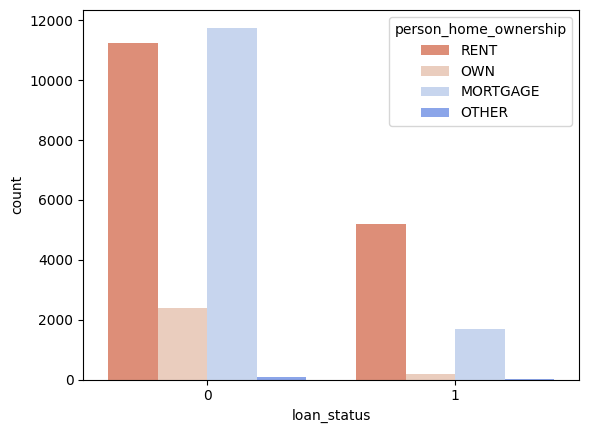

In [26]:
#loan status by home ownership
sns.countplot(x='loan_status',data=df,hue='person_home_ownership',palette="coolwarm_r");

In [27]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [28]:
df[df['person_home_ownership'] == 'OWN']['loan_status'].value_counts()

0    2391
1     193
Name: loan_status, dtype: int64

insights drawn:

A large percentage of people that didn't default the loan belong to the rent and mortgage category. Although a large percentage of those that requested for loan are in the rent and mortgage category.. it is quite inconclusive whether to say that those who own a house would default a loan or not, but we can deduce from the plot also that a larger percentage of home owners did not default on their loans. This suggests that homeownership might be a positive factor in predicting loan repayment.

Rent and Mortgage Applicants: While a significant percentage of loan applicants fall into the rent and mortgage category, it's important to note that a large percentage of them did not default. This could indicate that having a housing arrangement (whether renting or having a mortgage) does not necessarily lead to higher loan default rates.

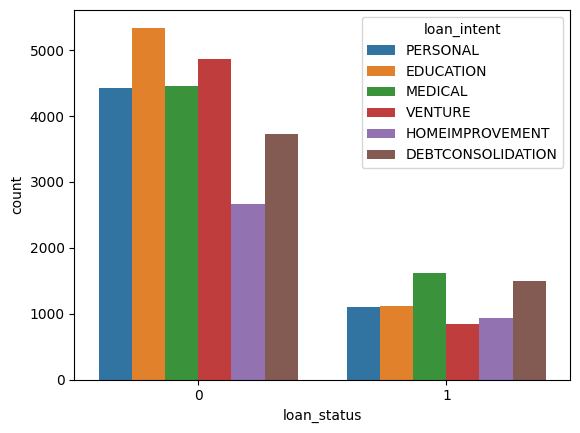

In [29]:
#loan status by loan intent
sns.countplot(x='loan_status',data=df,hue='loan_intent');

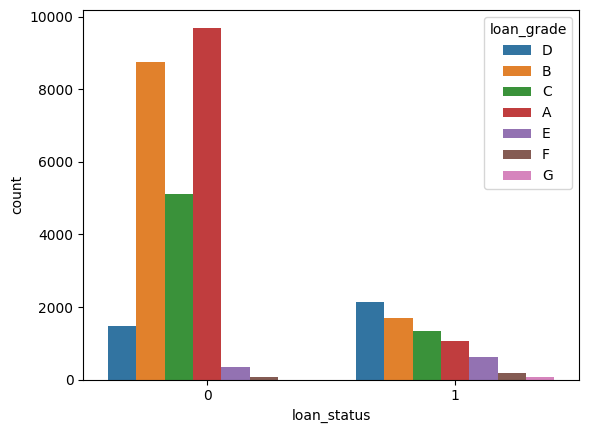

In [30]:
#loan status by loan grade
sns.countplot(x='loan_status',data=df,hue='loan_grade');

In [31]:
df[df['loan_grade'] == 'D']['loan_status'].value_counts()

1    2141
0    1485
Name: loan_status, dtype: int64

In [32]:
df[df['loan_grade'] == 'E']['loan_status'].value_counts()

1    621
0    343
Name: loan_status, dtype: int64

In [33]:
df[df['loan_grade'] == 'F']['loan_status'].value_counts()

1    170
0     71
Name: loan_status, dtype: int64

In [34]:
df[df['loan_grade'] == 'G']['loan_status'].value_counts()

1    63
0     1
Name: loan_status, dtype: int64

insights drawn:

checking by loan grade, a large percentage of people that didn't default the loan belong to the grade A, B and C category.

There's need to pay a close attention to the people in loan_grade D,E, F, and G category because more people in those category defaulted the loan.

The fact that a large percentage of individuals in loan grades A, B, and C did not default on their loans suggests that these grades represent lower risk borrowers, while grades D, E, F, and G may indicate higher risk borrowers.

The above insight shows that loan grade is a good feature to consider before granting a loan.

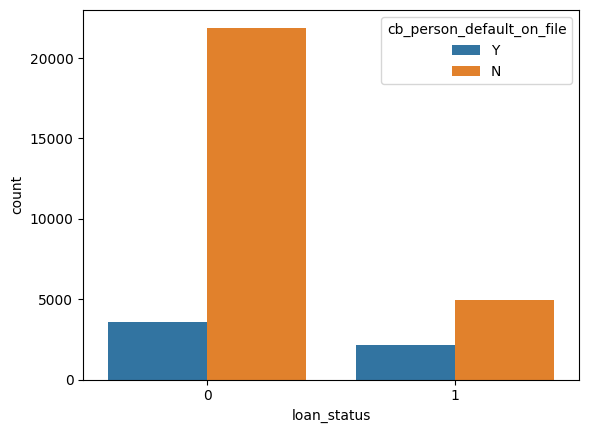

In [35]:
#loan status by historical default
sns.countplot(x='loan_status',data=df,hue='cb_person_default_on_file');

In [36]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

There's most likely a possibility that anyone who has a historical file record of not defaulting on a loan would not default on a new loan

In [37]:
#encoding categorical variables
encoder = LabelEncoder()

columns = ['person_home_ownership','loan_intent', 'loan_grade', 'cb_person_default_on_file']
for column in columns:
  df[column] = encoder.fit_transform(df[column])

In [38]:
#split data into input and target variables
x = df.drop(['loan_status'], axis = 1)
y = df['loan_status']

addressing the clas imbalance in the target column



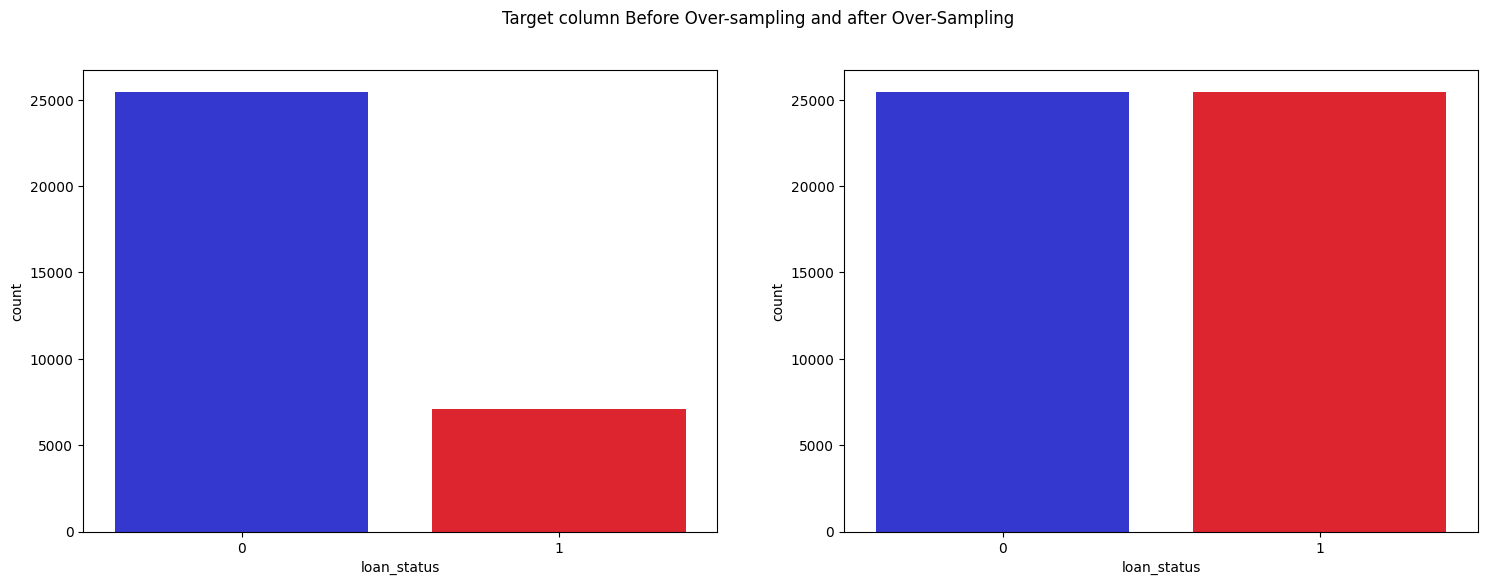

In [39]:
#Oversampling of the minority class in the target column

oversample = RandomOverSampler(sampling_strategy='not majority')
x_sampled, y_sampled = oversample.fit_resample(x, y)

x = x_sampled
y = y_sampled


#visualize the oversampling results
plt.figure(figsize=(18,6))
plt.suptitle('Target column Before Over-sampling and after Over-Sampling')
plt.subplot(1,2,1)
sns.countplot(x = df['loan_status'], palette=['#1a20e8','#fa0714'])
plt.subplot(1,2,2)
sns.countplot(data=pd.DataFrame(y),x = 'loan_status', palette=['#1a20e8','#fa0714'] )
plt.show()

In [40]:
#splitt dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# MODEL TRAINING

- decision tree

- XGBoost

- LightGBM

These models don't require scaling.

Decision trees do not rely on the scale of features. They make binary splits based on feature thresholds, so the scale of the features does not impact their performance.


Xgboost and Lightgbm work by sequentially fitting weak learners to the residuals. The scale of the features is also not a factor in this process.

1. DECISION TREE

In [41]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)
decision_pred = decision_model.predict(x_test)

print(confusion_matrix(y_test, decision_pred))

[[6899  760]
 [ 156 7469]]


In [42]:
print(classification_report(y_test, decision_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7659
           1       0.91      0.98      0.94      7625

    accuracy                           0.94     15284
   macro avg       0.94      0.94      0.94     15284
weighted avg       0.94      0.94      0.94     15284



2. XGBOOST

In [43]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print(confusion_matrix(y_test, xgb_pred))

[[7291  368]
 [ 648 6977]]


In [44]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7659
           1       0.95      0.92      0.93      7625

    accuracy                           0.93     15284
   macro avg       0.93      0.93      0.93     15284
weighted avg       0.93      0.93      0.93     15284



3. LIGHTGBM

In [45]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
lgb_pred = lgb_model.predict(x_test)

print(confusion_matrix(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 17848, number of negative: 17814
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 35662, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500477 -> initscore=0.001907
[LightGBM] [Info] Start training from score 0.001907
[[7283  376]
 [1200 6425]]


In [46]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7659
           1       0.94      0.84      0.89      7625

    accuracy                           0.90     15284
   macro avg       0.90      0.90      0.90     15284
weighted avg       0.90      0.90      0.90     15284



In [55]:
# Evaluate the tuned model on the test data
decision_tree_accuracy = decision_model.score(x_test, y_test)
xgb_accuracy = xgb_model.score(x_test, y_test)
lgb_accuracy = lgb_model.score(x_test, y_test)


In [56]:
#create a dictionary for the models and accuracies
model_df = {
    'Model': [
    'Decision Tree', 'XGBoost', 'LightGBM'
    ],

    'Accuracy(%)': [
        f"{decision_tree_accuracy*100:.2f}",
        f"{xgb_accuracy*100:.2f}",
        f"{lgb_accuracy*100:.2f}",
        ]
}


#create a dataframe from the dictionary
evaluation_metrics = pd.DataFrame(model_df)

evaluation_metrics



,Model,Accuracy(%)
0,Decision Tree,94.01
1,XGBoost,93.35
2,LightGBM,89.69


Here we are considering the precision on class 1.


Here's why precision for class 1 is important in this context:

Precision for class 1 measures the percentage of individuals predicted to default on loans who actually do default. In other words, it quantifies how accurate the model is when it predicts loan defaults.


By emphasizing precision for class 1, the startup can reduce the occurrence of false positives and ensure that when the model predicts loan default, it is highly likely to be accurate. This can lead to better risk management and lower financial losses due to defaults.

It aligns with the startup's goal of making sound lending decisions and minimizing the financial risks associated with loan defaults.



Of the three models trained, the XGBoost has a good balance between the precision and recall. Improving it's precision will be more favorable compared to the other models even if this will cause a reduction in the recall

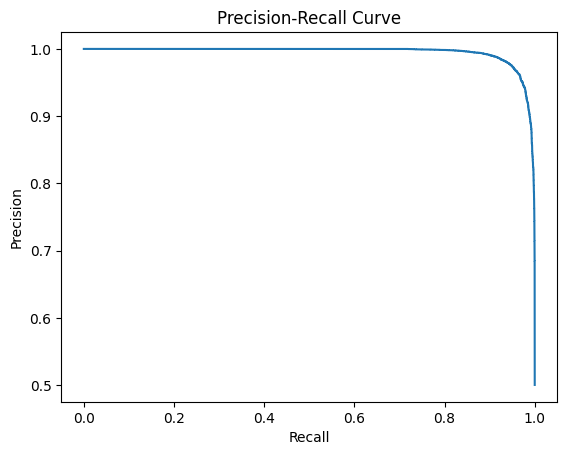

In [49]:
# Get predicted probabilities for the positive class (class 1) from the model
y_proba_train = xgb_model.predict_proba(x_train)[:, 1]

# Calculate precision, recall, and thresholds for different probability thresholds
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_proba_train)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

from the curve, it can be deduced that an increase in the precision of class 1 would result in an increase in the recall of class 1 also.

In [61]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):

 #create a dataframe of the thresholds with the curresponding precision and recall
prt = np.array(list(zip(precision, recall, thresholds)))
prt_df = pd.DataFrame(data=prt, columns=['Precision', 'Recall', 'Threshold'])
prt_df.tail(50)

,Precision,Recall,Threshold
24139,1.0,0.009301,0.999981
24140,1.0,0.009077,0.999981
24141,1.0,0.008853,0.999981
24142,1.0,0.008797,0.999982
24143,1.0,0.008628,0.999982
24144,1.0,0.008460,0.999983
24145,1.0,0.008236,0.999983
24146,1.0,0.007956,0.999984
24147,1.0,0.007732,0.999985
24148,1.0,0.007620,0.999985


In [51]:
y_proba_test = xgb_model.predict_proba(x_test)[:, 1]

#apply selected threshold to the predicted probabilities
adjusted_y_pred = (y_proba_test >=  0.827801).astype(int)
#np.count_nonzero(adjusted_y_pred)


After carefully selecting the threashold to ensure a good balance, though a favorable one to the precision on class 1,

In [52]:
print(classification_report(y_test, adjusted_y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      7659
           1       1.00      0.76      0.86      7625

    accuracy                           0.88     15284
   macro avg       0.90      0.88      0.88     15284
weighted avg       0.90      0.88      0.88     15284



For class 1, i have been able to adjust the threashold to obtain a precision of 1.

This implies that in this project case, when the model predicts that a customer would the default a loan, it's correct without doubt.
The aim for this project is now achieved.

In the end, we can be so sure that there will be accurate identification of customers who are likely to default, helping the startup to take proactive measures to mitigate the risk, such as adjusting interest rates, loan amounts, or even declining the loan application altogether thereby reducing every tendency of the startup to loose money to the loan applicants